# Assignment 01 - Machine Learning 2019/2020
Emanuel Fonseca - up200505480 PDEEC

***
***

### Exercise 1

Given $N_1$, $N_2$ and $N_t$, $y_{pred}$ may be obtained as shown below.

For each $x_t$ in $N_t$:

$$Z_1 = \frac{X_1-\mu_1}{\sigma_1}, Z_2 = \frac{X_2-\mu_2}{\sigma_2}$$
$$z_{t1} = \frac{x_t-\mu_1}{\sigma_1}, z_{t2} = \frac{x_t-\mu_2}{\sigma_2}$$
$$\mu_{t1} = \frac{1}{n_{1}}\sum_{i=1}^{n_1}{\|z_{t1} - Z_{1i}\|}$$
$$\mu_{t2} = \frac{1}{n_{2}}\sum_{i=1}^{n_2}{\|z_{t2} - Z_{2i}\|}$$
$$y_{pred} = \begin{cases} 1, & \mbox{if } \mu_{t1} < \mu_{t2} \\ 2, & \mbox{if } \mu_{t2} < \mu_{t1} \end{cases}$$

Where:

- $\mu_i$: Mean of Class i;
- $\sigma_i$: Standard deviation of Class i;
- $z_{ti}$: Normalized Unknown Data by $\mu_i$ and $\sigma_i$;
- $\mu_{ti}$: Mean Euclidean distance to Class i samples;


**Implementation of the algorithm**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def meanNormalizedPrediction(dataClass1, dataClass2, dataUnknownClass):
    #predict 
    n_axis = 0 if len(dataUnknownClass.shape) == 1 else 1 #check dimention of dataUnknownClass matrix
    prediction = np.empty(len(dataUnknownClass))
    dataClass1_norm = (dataClass1 - dataClass1.mean(axis=0)) / dataClass1.std(axis=0) #normalizing each feature of class 1 
    dataClass2_norm = (dataClass2- dataClass2.mean(axis=0)) / dataClass2.std(axis=0) #normalizing each feature of class 2
    dataU_norm_1 = (dataUnknownClass - dataClass1.mean(axis=0)) / dataClass1.std(axis=0) #normalizing dataUnknownClass by class1 std
    dataU_norm_2 = (dataUnknownClass - dataClass2.mean(axis=0))/ dataClass2.std(axis=0) #normalizing dataUnknownClass by class2 std
    for n in range(len(dataUnknownClass)): #loop over every sample of dataUnknownClass
        mean_euc_dist_1 = np.sqrt(np.sum(np.square(dataU_norm_1[n] - dataClass1_norm), axis=n_axis)).mean()
        mean_euc_dist_2 = np.sqrt(np.sum(np.square(dataU_norm_2[n] - dataClass2_norm), axis=n_axis)).mean()
        prediction[n] = 1 if mean_euc_dist_1 < mean_euc_dist_2 else 2 #select the class with the minimum mean distance to dataUnknownClass samples
    return prediction

In [3]:
def plot_data(heights, weights, classes):
    #Auxiliary function to plot data
    fig, ax = plt.subplots()
    scatter = ax.scatter(heights, weights, c=classes)
    legend1 = ax.legend(scatter.legend_elements()[0],('Male', 'Female'),
                         title="Classes")
    ax.add_artist(legend1)
    plt.xlabel('Height')
    plt.ylabel('Weight')
    plt.show()

**Importing 'heightWeightData.txt' data file.**

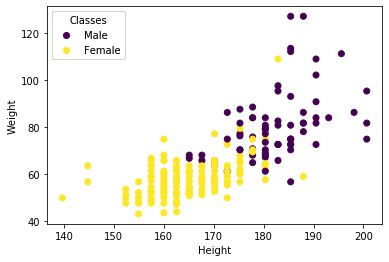

In [4]:
data_arr = np.loadtxt('heightWeightData.txt', delimiter=',')
plot_data(data_arr[:,1], data_arr[:,2], data_arr[:, 0])

***

### Exercise 1.a)

From the data imported was selected just the height feature and passed to the meanNormalizedPrediction function to estimate the classes of the unknown data.

Then error was given by the follow expression:
$$E_{train} = \frac{n_{miss}}{n_{total}}$$

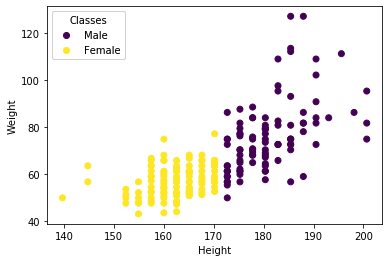

training_error = 0.18571428571428572


In [5]:
dataU = data_arr[:, 1]
class_1 = dataU[data_arr[:, 0] == 1]
class_2 = dataU[data_arr[:, 0] == 2]
prediction = meanNormalizedPrediction(class_1, class_2, dataU)
error = np.sum(np.abs(data_arr[:, 0] - prediction))/len(prediction)
plot_data(data_arr[:,1], data_arr[:,2], prediction)
print('training_error = {}'.format(error))

18% of the data was miss classified, but if considered that just one feature was passed, it is not a bad result.

***

### Exercise 1.b)

Now adding two features, height and weight.

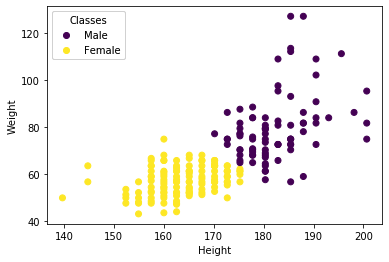

training_error = 0.13333333333333333


In [6]:
dataU = data_arr[:, 1:]
class_1 = dataU[data_arr[:, 0] == 1]
class_2 = dataU[data_arr[:, 0] == 2]
prediction = meanNormalizedPrediction(class_1, class_2, dataU)
error = np.sum(np.abs(data_arr[:, 0] - prediction))/len(prediction)
plot_data(data_arr[:,1], data_arr[:,2], prediction)
print('training_error = {}'.format(error))

As may have been expected adding another meaningful feature decreased the training error.

***

### Exercise 1.c)

Yes, it is possible using this algorithm to increase the training error by adding features.

Imagine that a feature that doesn't describe well the classification is added.
In the prior 2D projection, where the sample mean distance to a certain class is close to 0 and is correctly classified, now, with a third dimension (feature), the mean distance for the incorrect class may be closer, leading to a miss classification.

In the next example, 50 random feature are added recurvelly to the heightWeight dataset:

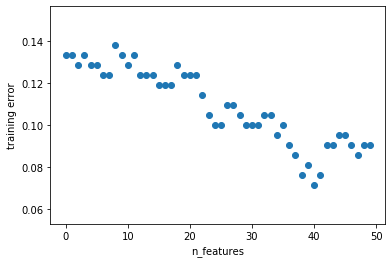

In [7]:
np.random.seed(seed=1)
error = np.empty(50)
data_ex = data_arr.copy()
for f in range(50):
    data_ex = np.append(data_ex, np.random.rand(210, 1), axis=1)
    dataU = data_ex[:, 1:]
    class_1 = dataU[data_ex[:, 0] == 1]
    class_2 = dataU[data_ex[:, 0] == 2]
    prediction = meanNormalizedPrediction(class_1, class_2, dataU)
    error[f] = np.sum(np.abs(data_ex[:, 0] - prediction))/len(prediction)
plt.scatter(list(range(len(error))),error)
plt.xlabel('n_features')
plt.ylabel('training error')
plt.show()

As it can be seen, although the tendency of the error is to decrease, in some iterations the training error increase.

***
***

### Exercise 2

### Exercise 2.a)

Given $\hat{y} = X_{test}\hat{w}$ and $\hat{w} = (X_{train}^tX_{train})^{-1}X_{train}^ty$ then:

$$\hat{y} = X_{test}(X_{train}^tX_{train})^{-1}X_{train}^ty$$

Where $X_{test}(X_{train}^tX_{train})^{-1}X_{train}^t$ is constant and may be called H.

Since a $Var(aX) = a^2 Var(X)$ and $y\sim N(wx, \sigma^2)$, therefor:

$$Var(\hat{y})= Var(Hy) = H^2Var(y) = H^2\sigma^2$$



***

### Exercise 2.b)

For $x_{test}=0$ then H is also equal to 0, therefore $Var(\hat{y}) = 0\times \sigma^2 = 0$.

***

### Exercise 2.c)

Using the same approach as the previous exercise, since $(X_{train}^tX_{train})^{-1}X_{train}^t$ is constant, if $\|x_{test}\| \to \infty \Rightarrow H \to \infty$. Therefore, $Var(\hat{y}) \to \infty$.